### Classical oscillatory behaviour in harmonic potential

Potential:
$$V(x) = \frac{1}{2}m\omega^2 x^2$$
With $E_0 = \hbar \omega$, as natural energy scale, $l_0 = \hbar^2/2mE_0$ as natural length scale:

$$\tilde{V}(\tilde{x}) = \frac{1}{4}\tilde{x}^2$$

We will shift the ground state gaussian shaped eigenstate to left by some dimensionless amount $a$

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import linalg as alg
plt.style.use('seaborn-whitegrid')

In [2]:
def kro(i,j):
    return 1 if i==j else 0

def U(ys,i):
    return 0.25*ys[i]**2

def H_ele(i,j,dy,ys): 
    return (-kro(i+1,j) + 2*kro(i,j) -kro(i-1,j))/dy**2  + U(ys,i)*kro(i,j)

In [3]:
a = 1.0 ## natural length scale
b = 0.0 ## position of centre of the packet
p0 = 1.0 ## central momentum 

dy = 0.1 # discretization of space 
y_lim = 6.0 # yspace half-width

ys = np.arange(-y_lim,y_lim,dy) # space points
N = len(ys)
print(N)
H = [[H_ele(i,j,dy,ys) for i in range(N)] for j in range(N)] # Hamiltonian N*N matrix
#print(H)

120


In [4]:
H_eigs, H_eigvs = alg.eig(H)

H_eigvalues = np.sort(H_eigs) # sorted eigenvalues
H_eigvectors = np.zeros((N,N))# to hold sorted eigenvectors

# loop to arrange eigenvectors in corresponding order of sorted eigenvalues #
for i in range(N):
    for j in range(N):
        if H_eigs[j] == H_eigvalues[i]:
            H_eigvectors[:,i] = H_eigvs[:,j]
            continue

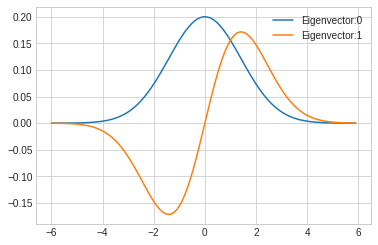

In [5]:
fig = plt.figure()
ax = fig.add_subplot()

for i in range(0,2):
    ax.plot(ys,H_eigvectors[:,i],label = 'Eigenvector:%d'%i)
ax.legend()

In [6]:
Phi0 = np.zeros((N), dtype = 'complex')
Phi0[0:N-10] = H_eigvectors[10:N,0] # shifted eigenvector made initial wavefunction

/home/deepanshu/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


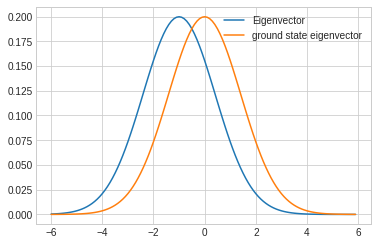

In [7]:
plt.plot(ys, Phi0,label = 'Eigenvector')
plt.plot(ys, H_eigvectors[:,0],label = 'ground state eigenvector')
plt.legend()

In [8]:
ci_s = [np.vdot(Phi0, H_eigvectors[:,i]) for i in range(N)] # coefficients

def Phi_tau(tau): # computes the wavepacket at time tau
    summation = np.zeros((N), dtype = 'complex')
    for i in range(N):
        summation += ci_s[i]*np.exp(-1j*H_eigvalues[i]*tau)*H_eigvectors[:,i]
    return summation

[(0.8824290128279193+0j), (-0.4413358930797494+0j), (0.15609952552187578+0j), (0.0451503905353245+0j), (-0.011337877565389207+0j), (-0.002598938710876104+0j), (0.0005716582220361021+0j), (0.00020565755120104971+0j), (-9.825355315607992e-05+0j), (-0.00012436598474171626+0j), (-8.98469129820088e-05+0j), (-0.00011013764037349557+0j), (-9.057987364543416e-05+0j), (-9.370155482117337e-05+0j), (8.873881837307709e-05+0j), (7.953220204527315e-05+0j), (-8.44878385451405e-05+0j), (-6.925109422492232e-05+0j), (-7.831660774735381e-05+0j), (6.254622484354037e-05+0j), (-7.097311910548708e-05+0j), (5.84219456161791e-05+0j), (-6.331193768076336e-05+0j), (5.577157866834662e-05+0j), (-5.6108828916503876e-05+0j), (5.365302655533425e-05+0j), (-4.9928058283480134e-05+0j), (5.1413881980912976e-05+0j), (4.5059881849225455e-05+0j), (4.872187018690916e-05+0j), (4.1522724136336004e-05+0j), (-4.553023235886047e-05+0j), (-3.911520168445403e-05+0j), (4.2001504811709334e-05+0j), (-3.7498610870138455e-05+0j), (-3.84

In [9]:
tvalues = np.arange(0,20.1,0.2)

In [10]:
Allprobs = np.zeros((N,len(tvalues))) # stores the psi^2 for every time in tvalues

for i in range(len(tvalues)):
    Allprobs[:,i]= np.abs(Phi_tau(tvalues[i]))**2

### Calculating expectation values and widths 

We use the following formulae

$$<x> = \sum_{i=1}^{N}Prob(x_i) \times x_i$$

$$<x^2> = \sum_{i=1}^{N}Prob(x_i) \times x_i^2 $$

$$\textit{Since there is a one to one correspondence between $x_i$ and $x_i^2$ therefore the probability of $x_i$ would be equal to probability of $x_i^2$ and hence the above formula works}$$

$$\sigma = \sqrt{(<x^2> - <x>^2)}$$

For a guassian curve, the FWHM = $2 \times \sqrt{2ln(2)}\sigma$

In [11]:
y_exps = np.zeros(len(tvalues)) # expectation values of y 
ysqr_exps = np.zeros(len(tvalues)) # expectation values of y^2
widths = np.zeros(len(tvalues)) # standard deviations

for i in range(len(tvalues)): # at all times
    for j in range(N):
        y_exps[i] += Allprobs[j,i]*ys[j]
        ysqr_exps[i] += Allprobs[j,i]*ys[j]**2
        
    widths[i] = (ysqr_exps[i] - y_exps[i]**2)**0.5 # standard deviation formula

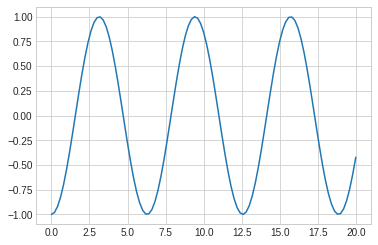

In [12]:
plt.plot(tvalues, y_exps)

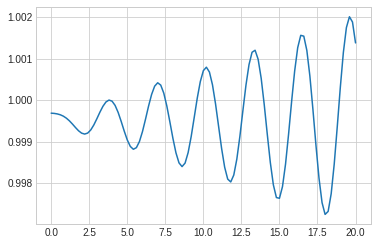

In [13]:
plt.plot(tvalues, widths)

In [14]:
potential = dy*dy*0.25*ys**2 # scaled down potential function

'''
for i in range(0, len(tvalues)):
    fig = plt.figure()
    ax = fig.add_subplot()
    ax.set(title = 'Oscillating wavefunction',xlabel = 'y',ylabel = 'Probability')
    ax.plot(ys,Allprobs[:,i],label = 'wavefunction')
    ax.plot(ys, potential,label = 'potential')
    ax.legend()
    plt.savefig("plot"+str(i)+ ".png", dpi=400)
    
'''

'\nfor i in range(0, len(tvalues)):\n    fig = plt.figure()\n    ax = fig.add_subplot()\n    ax.set(title = \'Oscillating wavefunction\',xlabel = \'y\',ylabel = \'Probability\')\n    ax.plot(ys,Allprobs[:,i],label = \'wavefunction\')\n    ax.plot(ys, potential,label = \'potential\')\n    ax.legend()\n    plt.savefig("plot"+str(i)+ ".png", dpi=400)\n    \n'

/home/deepanshu/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/deepanshu/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


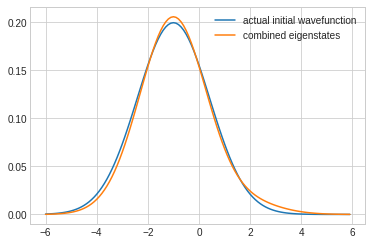

In [28]:
plt.plot(ys,Phi0,label = 'actual initial wavefunction')
wavefunc = np.zeros(N,dtype = 'complex')
for i in range(0,3):
    wavefunc += ci_s[i]*H_eigvectors[:,i]

plt.plot(ys,wavefunc,label = 'combined eigenstates')
plt.legend()